In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

from matplotlib import rcParams
from matplotlib import rcParamsDefault
from matplotlib import rc

import pyfbs

rcParams.update(rcParamsDefault)

#rc('font', **{'family': 'CMU Sans Serif', 'CMU Sans Serif': ['CMUSansSerif']})
rc('font', **{'family': 'CMU Serif'})
rcParams["mathtext.fontset"] = "cm"
rcParams['font.family']='serif'


/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:120: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(k is "mu"):


In [2]:
data_dir = "data/"
plot_dir = "plots/"

(250, 13)


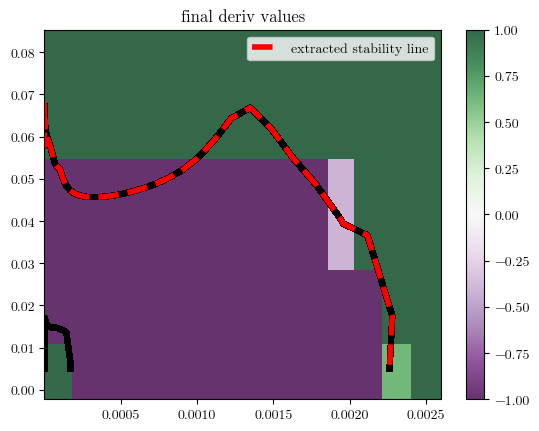

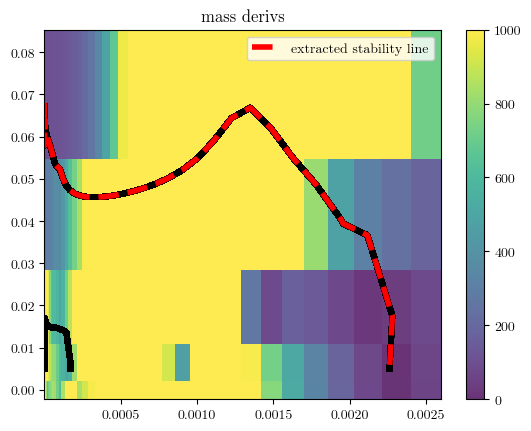

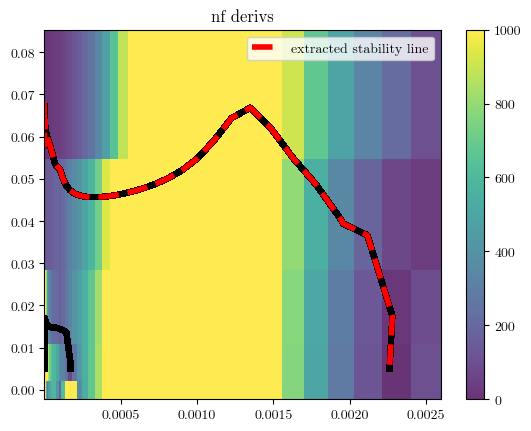

In [3]:
importlib.reload(pyfbs)

#filename = "mu10.0_lam0.0_120x120.txt"
#filename = "mu0.1_lam0.0_140x120.txt"
filename = "pow_mu0.1_lam100.0_100x100.txt"
filename = "mu01_test.txt"

df, indices = pyfbs.data.load_file(data_dir + filename)
print(np.shape(df))
stabCurve = pyfbs.stability_curve.calc_stability_curve(df, indices, debug=True, curve_index=0)

/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:187: RuntimeWarning: invalid value encountered in divide
  allRelativMassFractions = allNbs / (allNbs + allNfs)
/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatterHandle = pltAxs.scatter([], [], s = 20, color = "black", label="FBS Configurations", cmap=cmap) # I have to add this empty scatter plot, since otherwise no dot is being shown in the inset label for the "FBS Configurations"


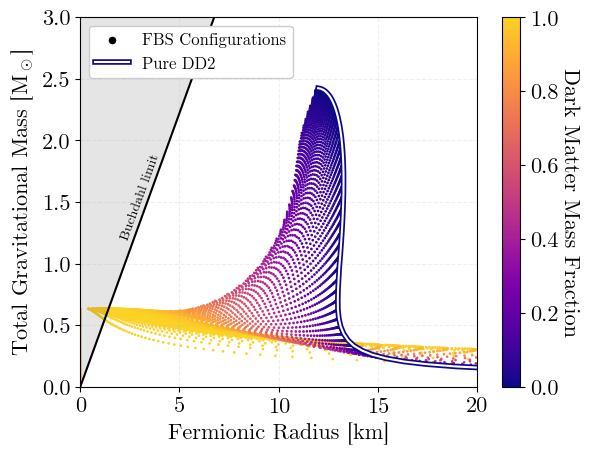

In [9]:
importlib.reload(pyfbs.plotting)

df4, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam0.0_120x120.txt")
df4, indices = pyfbs.data.add_Lambda_int(df4, indices)
sc4 =  pyfbs.stability_curve.calc_stability_curve(df4, indices, curve_index=0, debug=False, phiCutoff=10)


#pyfbs.plotting.scatter_XY(df4, indices, 'R_F', 'M_T', cmap="plasma", 
#    filterData= True, s = 0.9, stabCurve=sc4,xlabel=r"Fermionic Radius [km]", ylabel=r"Total Gravitational Mass [M$_\odot$]",
#    ylim=(0.,3.), xlim=[0, 20], plotPureBS=False, plotPureNS=True,
#    clim=[0,1.1], cmapRange=[0,1], showBuchdahlLimit=True
#)

pyfbs.plotting.scatter_XY(df4, indices, 'R_F', 'M_T', s = 0.9, 
    stabCurve=sc4, ylim=(0.,3.), xlim=(0, 20), cmap="plasma", clim = [0, 1.1], ylabel=r"Total Gravitational Mass [M$_\odot$]", 
    xlabel=r"Fermionic Radius [km]", tickFontSize=16, rasterized=True,
    cmapRange=[0, 1.0], plotPureBS=False, showBuchdahlLimit=True)

xtext = 2
ytext= 1.2
rotation=70

plt.text(x=xtext, y=ytext, s="Buchdahl limit", rotation=rotation, color="black")

plt.savefig(plot_dir + "MR_scatter.pdf", bbox_inches='tight', dpi=300)
plt.show()

/home/rofyd/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/rofyd/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


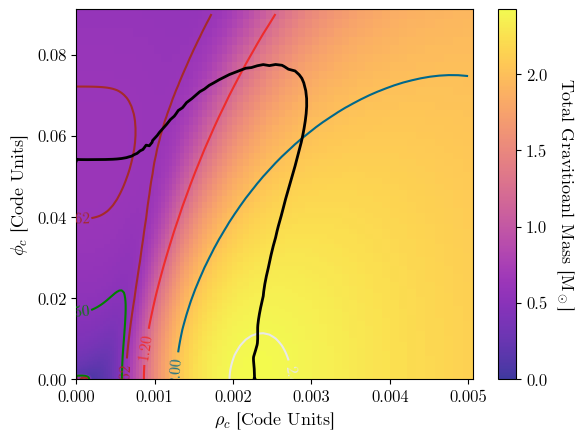

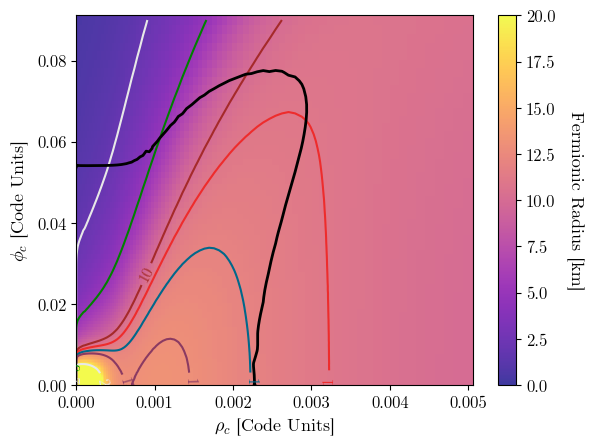

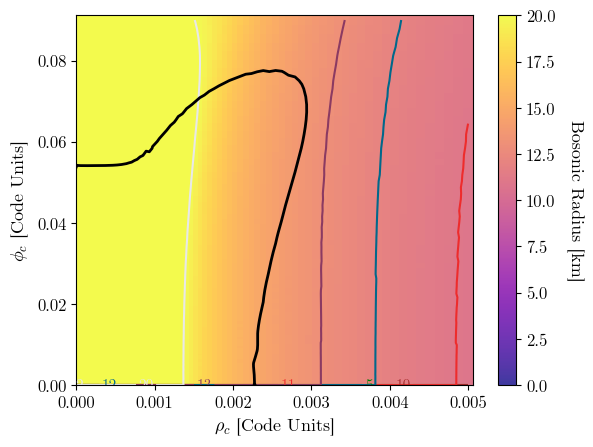

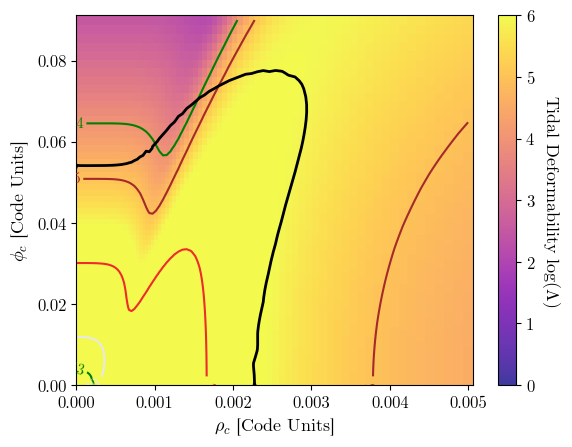

In [5]:
importlib.reload(pyfbs.plotting)

df4, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam0.0_120x120.txt")
df4, indices = pyfbs.data.add_Lambda_int(df4, indices)
sc4 =  pyfbs.stability_curve.calc_stability_curve(df4, indices, curve_index=0, phiCutoff=10)

dataFile = df4
stabCurve = sc4
contourColors = ['green', 'brown', '#EE2C2C', "#00688B", "#E8E8E8"]
contourLevels = [0.5, 0.62, 1.2, 2, 2.4]
cbarLabel = r"Total Gravitioanl Mass [M$_\odot$]"

pyfbs.plotting.plotRhoPhi(dataFile, indices, index = "M_T", stabCurve=stabCurve,
                   cbarLabel=cbarLabel, contourColors=contourColors, contourLevels=contourLevels)
plt.figure()
contourColors = ["#E8E8E8" ,'green', 'brown', '#EE2C2C', "#00688B", "#8B3A62"]
contourLevels = [2, 5, 10, 11, 12, 13, 20]
cbarLabel = r"Fermionic Radius [km]"
pyfbs.plotting.plotRhoPhi(dataFile, indices, index = "R_F", stabCurve=stabCurve,
                   cbarLabel=cbarLabel, contourColors=contourColors, contourLevels=contourLevels, clim = [0, 20])
plt.figure()
contourColors = ["#E8E8E8" ,'green', 'brown', '#EE2C2C', "#00688B", "#8B3A62"]
contourLevels = [2, 5, 10, 11, 12, 13, 20]
cbarLabel = r"Bosonic Radius [km]"
pyfbs.plotting.plotRhoPhi(dataFile, indices, index = "R_B_0", stabCurve=stabCurve,
                   cbarLabel=cbarLabel, contourColors=contourColors, contourLevels=contourLevels, clim = [0, 20])
plt.figure()
contourColors = ["#E8E8E8" ,'green', 'brown', '#EE2C2C']
contourLevels = [2, 4, 5, 7, 10, 13]
cbarLabel = r"Tidal Deformability log($\Lambda$)"
pyfbs.plotting.plotRhoPhi(dataFile, indices, index = "lambda_tidal", stabCurve=stabCurve,
                   cbarLabel=cbarLabel, contourColors=contourColors, contourLevels=contourLevels, scale = "log", clim = [0, 6])
plt.show()

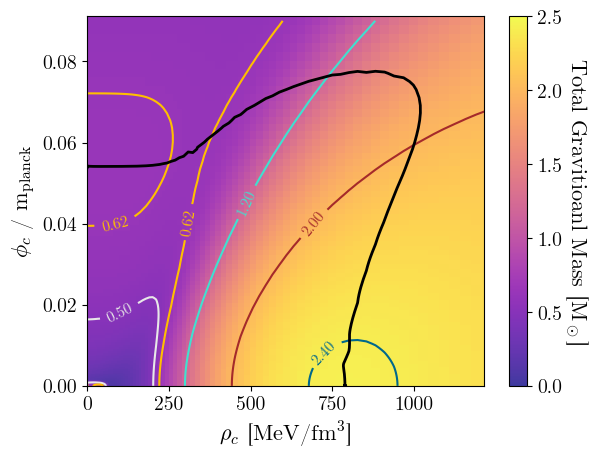

In [33]:
importlib.reload(pyfbs.plotting)

df4, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam0.0_120x120.txt")
df4, indices = pyfbs.data.add_Lambda_int(df4, indices)
sc4 =  pyfbs.stability_curve.calc_stability_curve(df4, indices, curve_index=0, phiCutoff=10)

factor = 2.886376934e-6# * 939.565379

for sol in df4:
    sol[indiceſ["rho_0"]] /= factor

for val in sc4:
    val[0] /= factor

dataFile = df4
stabCurve = sc4
contourColors = ["#E8E8E8", '#FFBF00', '#40E0D0', 'brown', "#00688B"]
contourLevels = [0.5, 0.62, 1.2, 2.0, 2.4]
cbarLabel = r"Total Gravitioanl Mass [M$_\odot$]"

hmm = [(0.00025/factor, 0.02), (0.00025/factor, 0.04), (0.001/factor, 0.04), (0.00125/factor, 0.047), (0.002/factor, 0.04), (0.002/factor, 0.01)]


pyfbs.plotting.plotRhoPhi(dataFile, indices, index = "M_T", stabCurve=stabCurve,
                   cbarLabel=cbarLabel, contourColors=contourColors, contourLevels=contourLevels,
                   xlim=[0, 0.0035/factor], 
                   xlabel = r"$\rho_c$ [MeV/fm$^3$]",
                   ylabel = r"$\phi_c$ / m$_{\rm planck}$",
#                   ylabel = r"$\phi_c$ [m$_{\rm planck}$]",
                   manualContourPos = hmm, tickFontSize=16, clim=[0, 2.5])
plt.savefig(plot_dir + "stability.pdf", bbox_inches='tight')
plt.show()


In [10]:
importlib.reload(pyfbs.data)
data_dir = "data/"
df1, indices_ = pyfbs.data.load_file(data_dir + "pow_mu0.1_lam0.0_100x100.txt")
df1, indices_ = pyfbs.data.add_Lambda_int(df1, indices_)
sc1 = pyfbs.stability_curve.calc_stability_curve(df1, indices_, curve_index=0, phiCutoff=10)

df2, indices_ = pyfbs.data.load_file(data_dir + "pow_mu0.1_lam10.0_100x100.txt")
df2, indices_ = pyfbs.data.add_Lambda_int(df2, indices_)
sc2 = pyfbs.stability_curve.calc_stability_curve(df2, indices_, curve_index=0, phiCutoff=10)

df3, indices_ = pyfbs.data.load_file(data_dir + "pow_mu0.1_lam100.0_100x100.txt")
df3, indices_ = pyfbs.data.add_Lambda_int(df3, indices_)
sc3 = pyfbs.stability_curve.calc_stability_curve(df3, indices_, curve_index=0, phiCutoff=10)

df4, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam0.0_120x120.txt")
df4, indices = pyfbs.data.add_Lambda_int(df4, indices)
sc4 =  pyfbs.stability_curve.calc_stability_curve(df4, indices, curve_index=0, debug=False)

df5, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam10.0_120x120.txt")
df5, indices = pyfbs.data.add_Lambda_int(df5, indices)
sc5 = pyfbs.stability_curve.calc_stability_curve(df5, indices,  curve_index=0)

df6, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam100.0_120x120.txt")
df6, indices = pyfbs.data.add_Lambda_int(df6, indices)
sc6 = pyfbs.stability_curve.calc_stability_curve(df6, indices, curve_index=0)

df7, indices = pyfbs.data.load_file(data_dir + "mu10.0_lam0.0_120x120.txt")
df7, indices = pyfbs.data.add_Lambda_int(df7, indices)
sc7 = pyfbs.stability_curve.calc_stability_curve(df7, indices, curve_index=0, phiCutoff=10)

df8, indices = pyfbs.data.load_file(data_dir + "mu10.0_lam10.0_120x120.txt")
df8, indices = pyfbs.data.add_Lambda_int(df8, indices)
sc8 = pyfbs.stability_curve.calc_stability_curve(df8, indices, curve_index=0, phiCutoff=10)

df9, indices = pyfbs.data.load_file(data_dir + "mu10.0_lam100.0_120x120.txt")
df9, indices = pyfbs.data.add_Lambda_int(df9, indices)
sc9 = pyfbs.stability_curve.calc_stability_curve(df9, indices, curve_index=0, phiCutoff=10)


/home/rofyd/Documents/gitstuff/B09/pyfbs/stability_curve.py:68: RuntimeWarning: invalid value encountered in divide
  perp /= np.linalg.norm(perp)


/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:187: RuntimeWarning: invalid value encountered in divide
  allRelativMassFractions = allNbs / (allNbs + allNfs)
/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatterHandle = pltAxs.scatter([], [], s = 20, color = "black", label="FBS Configurations", cmap=cmap) # I have to add this empty scatter plot, since otherwise no dot is being shown in the inset label for the "FBS Configurations"


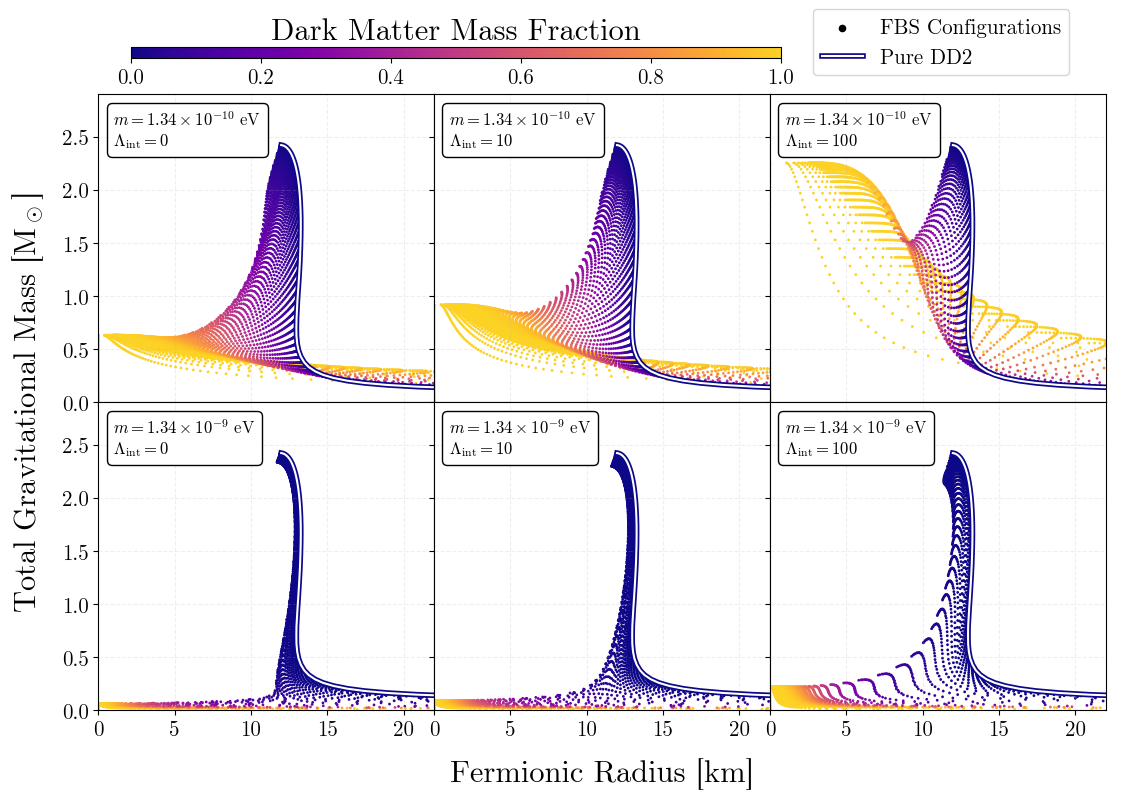

In [16]:
importlib.reload(pyfbs.plotting)
importlib.reload(pyfbs.stability_curve)

axs1 = pyfbs.plotting.grid_Scatter([ df4, df5, df6, df7, df8, df9], indices, 
                 scatterFunc = pyfbs.plotting.scatter_XY, X='R_F', Y='M_T',
                 ylabel=r"Total Gravitational Mass [M$_\odot$]", 
                 xlabel=r"Fermionic Radius [km]",
                 nrows = 2, ncols = 3, figHeight=8, figWidth=13,
                 cmap="plasma", tickFontSize = 15, clim=[0, 1.1], cmapRange=[0, 1],
                 s = 1, ylim = [0, 2.9], xlim = [0, 22], plotPureBS=False, pureNSIndexOffset = 10,
                 stabCurves=[ sc4, sc5, sc6, sc7, sc8, sc9],
                 overlay_loc=2,
                 overlay_info={'mu':"m", 'Lambda_int':"\Lambda_{\\rm int}"},
                 rasterized=True)


plt.savefig(plot_dir + "MR_3x2.pdf", bbox_inches='tight', dpi=400)
plt.show()

/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:187: RuntimeWarning: invalid value encountered in divide
  allRelativMassFractions = allNbs / (allNbs + allNfs)
/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatterHandle = pltAxs.scatter([], [], s = 20, color = "black", label="FBS Configurations", cmap=cmap) # I have to add this empty scatter plot, since otherwise no dot is being shown in the inset label for the "FBS Configurations"


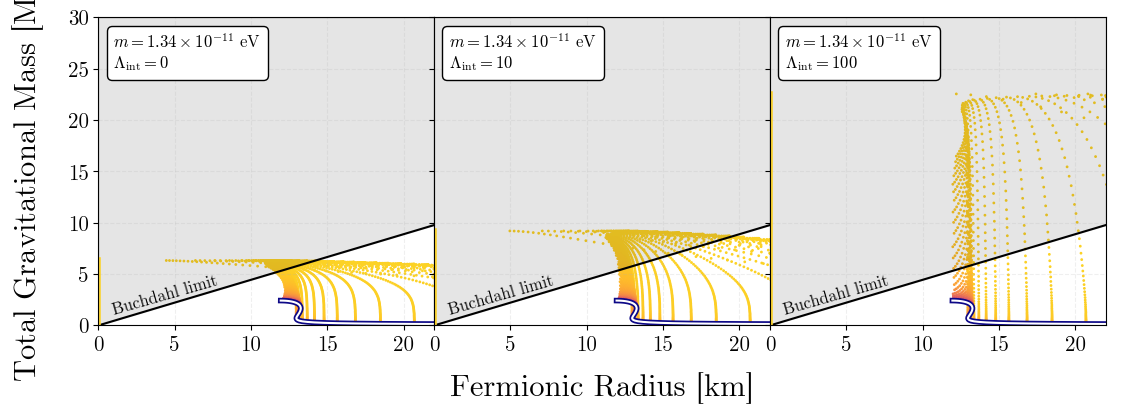

In [17]:
importlib.reload(pyfbs.plotting)
from matplotlib.transforms import Bbox

_, axs2 = pyfbs.plotting.grid_Scatter([ df1, df2, df3], indices_, 
                 scatterFunc = pyfbs.plotting.scatter_MR, 
                 ylabel=r"Total Gravitational Mass [M$_\odot$]", 
                 xlabel=r"Fermionic Radius [km]",
                 nrows = 1, ncols = 3, figHeight=4, figWidth=13,
                 cmap="plasma", tickFontSize = 15,
                 s = 1,  ylim = [0, 30], xlim = [0, 22], #plotPureBS=True,
                 stabCurves=[ sc1, sc2, sc3], clim=[0, 1.1], cmapRange=[0, 1],
                 overlay_info={'mu':"m", 'Lambda_int':"\Lambda_{\\rm int}"}, overlay_loc=2,
                 addColorbar=False, addLegend=False, showBuchdahlLimit=True, rasterized=True)

#plt.subplots_adjust(hspace=)
#axs2[0].set_ylim(0,7.)
#axs2[1].set_ylim(0,10.)
#axs2[2].set_ylim(0,25.)
for ax in axs2:
    xtext = 0.8
    ytext = 1.1
    rotation = 16

    ax.text(x=xtext, y=ytext, s="Buchdahl limit", rotation=rotation, color="black", fontsize=12)

niceBoundingBox = Bbox.from_bounds(0.6, -0.4, 11.2, 4.5)
plt.savefig(plot_dir + "MR_3x1.pdf", bbox_inches=niceBoundingBox, dpi=400)
plt.show()

/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:187: RuntimeWarning: invalid value encountered in divide
  allRelativMassFractions = allNbs / (allNbs + allNfs)
/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatterHandle = pltAxs.scatter([], [], s = 20, color = "black", label="FBS Configurations", cmap=cmap) # I have to add this empty scatter plot, since otherwise no dot is being shown in the inset label for the "FBS Configurations"
/home/rofyd/Documents/gitstuff/B09/pyfbs/data.py:25: RuntimeWarning: invalid value encountered in divide
  df = np.append(df, np.transpose([ df[:,indices['lambda_tidal']]/df[:,indices['M_T']]**5  ]), axis=1)


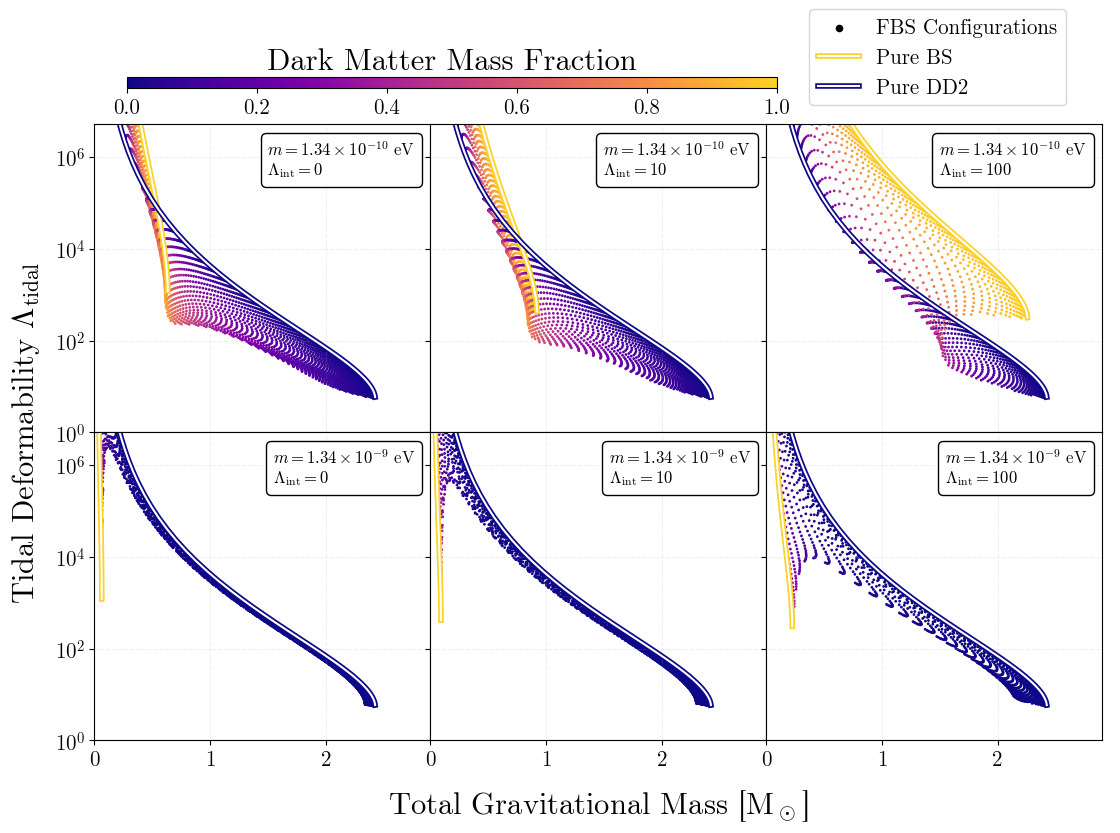

In [20]:
importlib.reload(pyfbs.plotting)
importlib.reload(pyfbs.stability_curve)

axs = pyfbs.plotting.grid_Scatter([df4, df5, df6, df7, df8, df9], indices, 
                 xlabel=r"Total Gravitational Mass [M$_\odot$]",
                 ylabel=r"Tidal Deformability $\Lambda_{\rm tidal}$",
                 plotPureBS=True, figHeight=8, figWidth=13,
                 scatterFunc = pyfbs.plotting.scatter_Tidal, nrows = 2, ncols = 3, s = 1, 
                 cmap="plasma", ylim = [1, 5e6], xlim = [0, 2.9], tickFontSize = 15,
                 stabCurves=[sc4, sc5, sc6, sc7, sc8, sc9], clim=[0, 1.1], cmapRange=[0, 1], pureNSIndexOffset = 10,
                 overlay_info={'mu':"m", 'Lambda_int':"\Lambda_{\\rm int}"}, rasterized=True)

plt.savefig(plot_dir + "ML_3x2.pdf", bbox_inches='tight', dpi=400)
plt.show()

/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:187: RuntimeWarning: invalid value encountered in divide
  allRelativMassFractions = allNbs / (allNbs + allNfs)
/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatterHandle = pltAxs.scatter([], [], s = 20, color = "black", label="FBS Configurations", cmap=cmap) # I have to add this empty scatter plot, since otherwise no dot is being shown in the inset label for the "FBS Configurations"


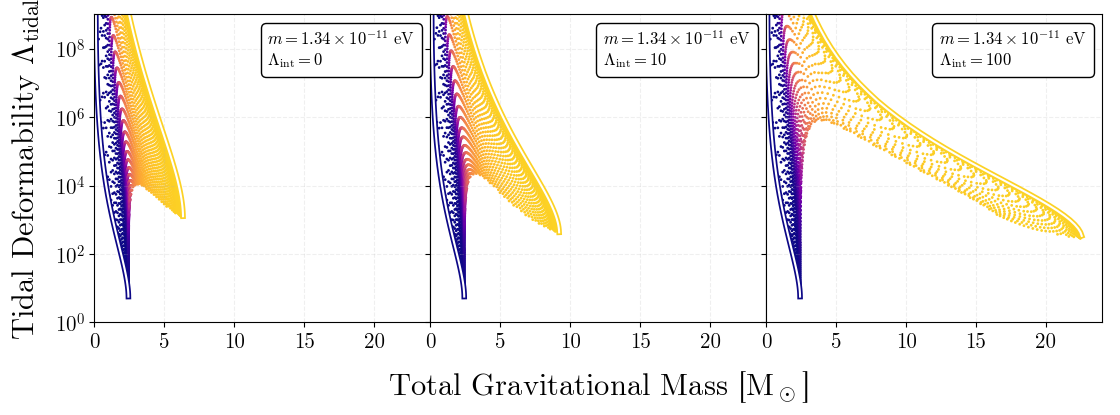

In [21]:
importlib.reload(pyfbs.plotting)

fig, axs2 = pyfbs.plotting.grid_Scatter([df1, df2, df3], indices_, 
                 xlabel=r"Total Gravitational Mass [M$_\odot$]",
                 ylabel=r"Tidal Deformability $\Lambda_{\rm tidal}$",
                 plotPureBS=True, figHeight=4, figWidth=13,
                 scatterFunc = pyfbs.plotting.scatter_Tidal, nrows = 1, ncols = 3, s = 1, 
                 cmap="plasma", ylim = [1, 1e9], xlim=[0, 24], tickFontSize = 15,
                 stabCurves=[sc1, sc2, sc3], clim=[0, 1.1], cmapRange=[0, 1],
                 overlay_info={'mu':"m", 'Lambda_int':"\Lambda_{\\rm int}"},
                 addColorbar=False, addLegend=False, rasterized=True)
'''

left, bottom, width, height = [0.25, 0.22, 0.12, 0.25]
testax = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.51, 0.22, 0.12, 0.25]
testax2 = fig.add_axes([left, bottom, width, height])

#testax.plot([1,2,3], [1,2,3])
#pyfbs.plotting.scatter_XY(df1, indices_, 'M_T', 'Lambda_tidal', s = 0.9, stabCurve=sc1, ylim=(1e2,1e6), xlim=(0, 5), pltAxs=testax, yscale="log")
pyfbs.plotting.scatter_Tidal(df1, indices_, s = 0.7, cmap = "plasma", stabCurve=sc1, ylim=(1e2,1e5), xlim=(0, 7), pltAxs=testax)
pyfbs.plotting.scatter_Tidal(df2, indices_, s = 0.7, cmap = "plasma", stabCurve=sc2, ylim=(1e2,1e5), xlim=(0, 10), pltAxs=testax2)
'''

#axs2[0].set_xlim(0, 7)
#axs2[1].set_xlim(0, 10); axs2[1].tick_params( labelleft=False, left=False)
#axs2[2].set_xlim(0, 24); axs2[2].tick_params( labelleft=False, left=False)
plt.savefig(plot_dir + "ML_3x1.pdf", bbox_inches='tight', dpi=400)
plt.show()

In [22]:
importlib.reload(pyfbs.data)
data_dir = "data2/"
df1, indices_ = pyfbs.data.load_file(data_dir + "mu0.1_lam0.0_120x120.txt")
df1, indices_ = pyfbs.data.add_Lambda_int(df1, indices_)
sc1 = pyfbs.stability_curve.calc_stability_curve(df1, indices_, curve_index=0, phiCutoff=10)

df2, indices_ = pyfbs.data.load_file(data_dir + "mu0.1_lam10.0_120x120.txt")
df2, indices_ = pyfbs.data.add_Lambda_int(df2, indices_)
sc2 = pyfbs.stability_curve.calc_stability_curve(df2, indices_, curve_index=0, phiCutoff=10)

df3, indices_ = pyfbs.data.load_file(data_dir + "mu0.1_lam100.0_120x120.txt")
df3, indices_ = pyfbs.data.add_Lambda_int(df3, indices_)
sc3 = pyfbs.stability_curve.calc_stability_curve(df3, indices_, curve_index=0, phiCutoff=10)

df4, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam0.0_120x120.txt")
df4, indices = pyfbs.data.add_Lambda_int(df4, indices)
sc4 =  pyfbs.stability_curve.calc_stability_curve(df4, indices, curve_index=0, phiCutoff=10)

df5, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam10.0_120x120.txt")
df5, indices = pyfbs.data.add_Lambda_int(df5, indices)
sc5 = pyfbs.stability_curve.calc_stability_curve(df5, indices,  curve_index=0, phiCutoff=10)

df6, indices = pyfbs.data.load_file(data_dir + "mu1.0_lam100.0_120x120.txt")
df6, indices = pyfbs.data.add_Lambda_int(df6, indices)
sc6 = pyfbs.stability_curve.calc_stability_curve(df6, indices, curve_index=0, phiCutoff=10)

df7, indices = pyfbs.data.load_file(data_dir + "mu10.0_lam0.0_120x120.txt")
df7, indices = pyfbs.data.add_Lambda_int(df7, indices)
sc7 = pyfbs.stability_curve.calc_stability_curve(df7, indices, curve_index=0, phiCutoff=10)

df8, indices = pyfbs.data.load_file(data_dir + "mu10.0_lam10.0_120x120.txt")
df8, indices = pyfbs.data.add_Lambda_int(df8, indices)
sc8 = pyfbs.stability_curve.calc_stability_curve(df8, indices, curve_index=0, phiCutoff=10)

df9, indices = pyfbs.data.load_file(data_dir + "mu10.0_lam100.0_120x120.txt")
df9, indices = pyfbs.data.add_Lambda_int(df9, indices)
sc9 = pyfbs.stability_curve.calc_stability_curve(df9, indices, curve_index=0, phiCutoff=10)


/home/rofyd/Documents/gitstuff/B09/pyfbs/stability_curve.py:68: RuntimeWarning: invalid value encountered in divide
  perp /= np.linalg.norm(perp)


# adjust the R_g by a factor of 1.476625061

In [29]:
for df in [df4, df5, df6, df7, df8, df9]:
    df[:,indices["R_G"]] *= 1.476625061

for df in [df1, df2, df3]:
    df[:,indices_["R_G"]] *= 1.476625061

/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:187: RuntimeWarning: invalid value encountered in divide
  allRelativMassFractions = allNbs / (allNbs + allNfs)
/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatterHandle = pltAxs.scatter([], [], s = 20, color = "black", label="FBS Configurations", cmap=cmap) # I have to add this empty scatter plot, since otherwise no dot is being shown in the inset label for the "FBS Configurations"


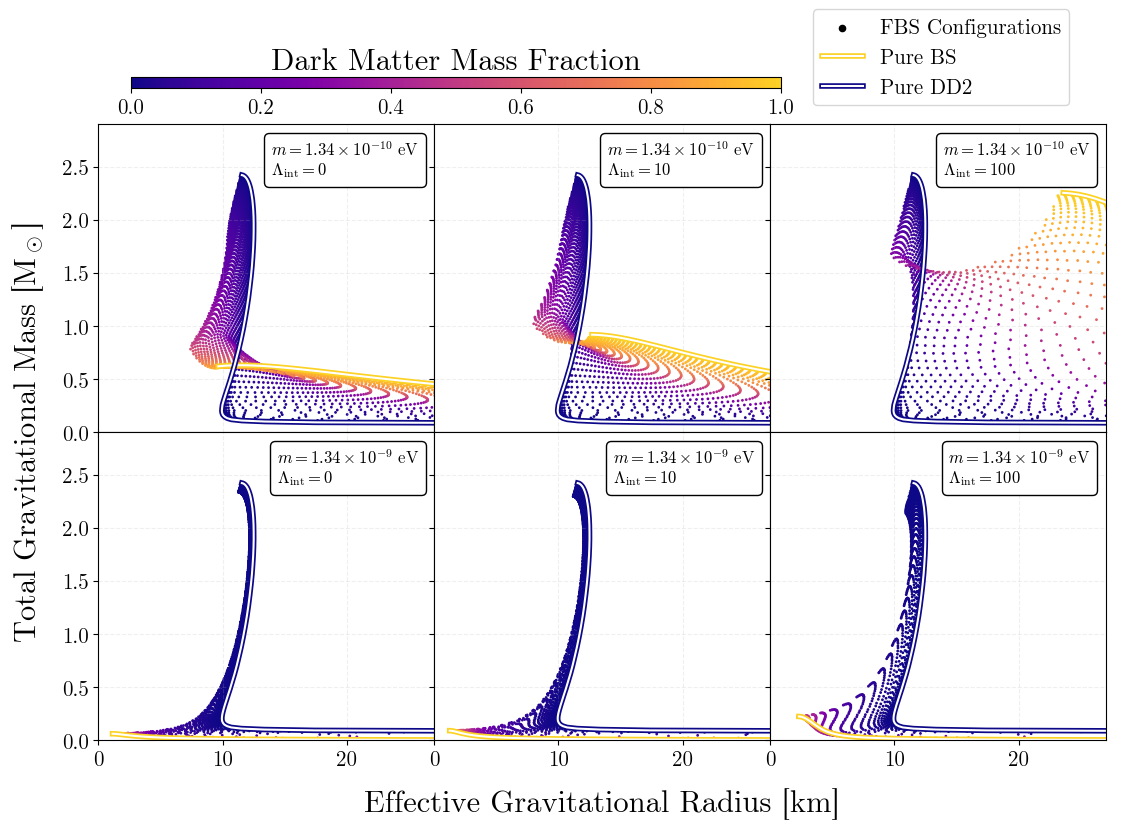

In [33]:
importlib.reload(pyfbs.plotting)
importlib.reload(pyfbs.stability_curve)

axs1 = pyfbs.plotting.grid_Scatter([ df4, df5, df6, df7, df8, df9], indices, 
                 scatterFunc = pyfbs.plotting.scatter_XY, X='R_G', Y='M_T',
                 ylabel=r"Total Gravitational Mass [M$_\odot$]", 
                 xlabel=r"Effective Gravitational Radius [km]",
                 nrows = 2, ncols = 3, figHeight=8, figWidth=13,
                 cmap="plasma", tickFontSize = 15, clim=[0, 1.1], cmapRange=[0, 1],
                 s = 1, ylim = [0, 2.9], xlim = [0, 27], plotPureBS=True, pureNSIndexOffset = 10,
                 stabCurves=[ sc4, sc5, sc6, sc7, sc8, sc9],
                 overlay_loc=1,
                 overlay_info={'mu':"m", 'Lambda_int':"\Lambda_{\\rm int}"}, rasterized=True)


plt.savefig(plot_dir + "MRg_3x2.pdf", bbox_inches='tight', dpi=400)
plt.show()

/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:187: RuntimeWarning: invalid value encountered in divide
  allRelativMassFractions = allNbs / (allNbs + allNfs)
/home/rofyd/Documents/gitstuff/B09/pyfbs/plotting.py:226: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatterHandle = pltAxs.scatter([], [], s = 20, color = "black", label="FBS Configurations", cmap=cmap) # I have to add this empty scatter plot, since otherwise no dot is being shown in the inset label for the "FBS Configurations"


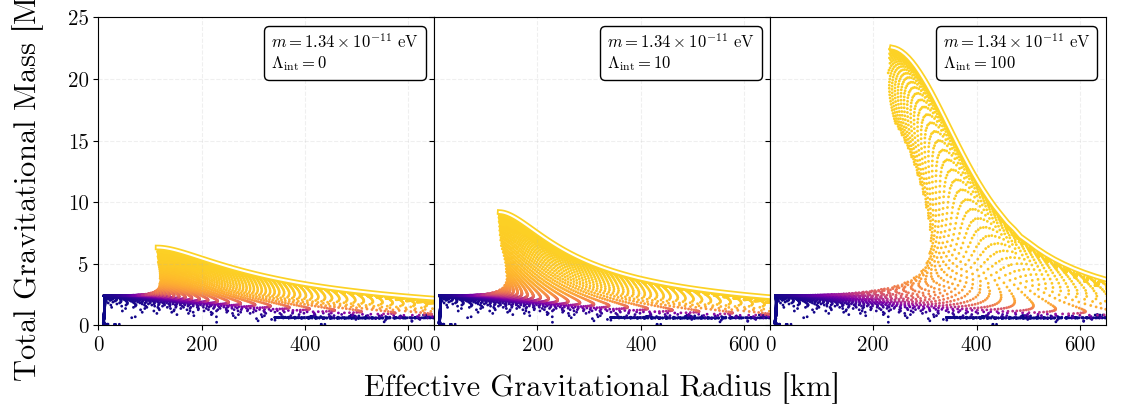

In [35]:
importlib.reload(pyfbs.plotting)
from matplotlib.transforms import Bbox

axs2 = pyfbs.plotting.grid_Scatter([ df1, df2, df3], indices_, 
                 scatterFunc = pyfbs.plotting.scatter_XY, X='R_G', Y='M_T', 
                 ylabel=r"Total Gravitational Mass [M$_\odot$]",
                 xlabel=r"Effective Gravitational Radius [km]",
                 nrows = 1, ncols = 3, figHeight=4, figWidth=13,
                 cmap="plasma", tickFontSize = 15, plotPureNS = False,
                 s = 1,  ylim = [0, 25], xlim = [0, 650], #plotPureBS=True,
                 stabCurves=[ sc1, sc2, sc3], clim=[0, 1.1], cmapRange=[0, 1],
                 overlay_info={'mu':"m", 'Lambda_int':"\Lambda_{\\rm int}"}, overlay_loc=1,
                 addColorbar=False, addLegend=False, rasterized=True)

#plt.subplots_adjust(hspace=)
#axs2[0].set_ylim(0,7.)
#axs2[1].set_ylim(0,10.)
#axs2[2].set_ylim(0,25.)

niceBoundingBox = Bbox.from_bounds(0.6, -0.4, 11.2, 4.5)
plt.savefig(plot_dir + "MRg_3x1.pdf", bbox_inches=niceBoundingBox, dpi=400)
plt.show()